<a href="https://colab.research.google.com/github/ivarbratberg/finans/blob/master/fond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Her bare tester jeg søketet

!pip install investpy
import investpy

# Returnerer en liste med treff
search_results = investpy.search_quotes(text='yar',
                                        products=['stocks'],
                                        countries=['norway'],                                        
                                        n_results=10)
# Velg den første fra lista, har sjekket at den er den riktige
a=search_results[0].retrieve_historical_data(from_date='01/01/2021', to_date='18/03/2021')

     |████████████████████████████████| 4.4MB 8.6MB/s 
     |████████████████████████████████| 245kB 44.7MB/s 
     |████████████████████████████████| 5.5MB 52.3MB/s 
     |████████████████████████████████| 512kB 41.2MB/s 
  Created wheel for investpy: filename=investpy-1.0.3-cp37-none-any.whl size=4466737 sha256=4ac7aac2212260134da58575e89bc8a6404a038c8ed0d23841ff8988c0c8e634
  Stored in directory: /root/.cache/pip/wheels/ef/ef/31/cd22f970a59025c6d6dee56091b1f538d850e932697db1950e
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9


{'pairId': 381, 'name': 'Yara International ASA', 'flag': 'Norway', 'link': '/equities/yara-internat', 'symbol': 'YAR', 'type': 'Stock - Oslo', 'pair_type_raw': 'Equities', 'pair_type': 'equities', 'countryID': 60, 'sector': 7, 'region': 6, 'industry': 9, 'isCrypto': False, 'exchange': 'Oslo', 'exchangeID': 8}
{'pairId': 33380, 'name': 'Yara International ASA', 'flag': 'Norway', 'link': '/equities/yara-internat?cid=33380', 'symbol': 'YARo', 'type': 'Stock - BATS Europe', 'pair_type_raw': 'Equities', 'pair_type': 'equities', 'countryID': 60, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'BATS Europe', 'exchangeID': 121}


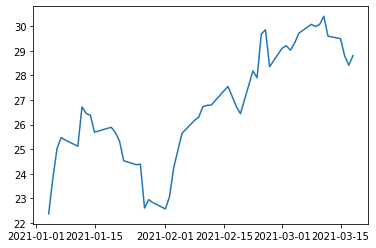

In [4]:
# Test plotting
import matplotlib.pyplot as plt
plt.plot(a['High'])
plt.show()

{'pairId': 1166631, 'name': 'Klp Aksjeglobal Mer Samfunnsansvar', 'flag': 'Norway', 'link': '/funds/no0010821614', 'symbol': '0P0001DFBS', 'type': 'Fund - Oslo', 'pair_type_raw': 'fund', 'pair_type': 'fund', 'countryID': 60, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Oslo', 'exchangeID': 8}
{'pairId': 252, 'name': 'Microsoft Corporation', 'flag': 'USA', 'link': '/equities/microsoft-corp', 'symbol': 'MSFT', 'type': 'Stock - NASDAQ', 'pair_type_raw': 'Equities', 'pair_type': 'equities', 'countryID': 5, 'sector': 4, 'region': 1, 'industry': 64, 'isCrypto': False, 'exchange': 'NASDAQ', 'exchangeID': 2}
{'pairId': 1032619, 'name': 'Odin Norge C', 'flag': 'Norway', 'link': '/funds/odin-norge-c-nok', 'symbol': '0P00000SVG', 'type': 'Fund - Oslo', 'pair_type_raw': 'fund', 'pair_type': 'fund', 'countryID': 60, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Oslo', 'exchangeID': 8}
{'pairId': 1130525, 'name': 'Odin Norden C', 'flag': 'Norway

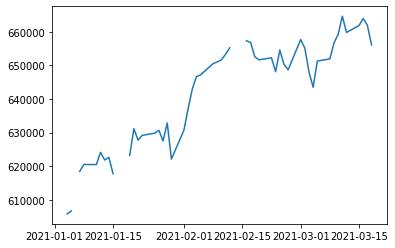

In [5]:
# Her putter jeg inn (søkestreng slik at søket blir unikgt, antall aksjer, kurs (om akjsern er i annen valuta,'funds'/'stocks',land))
import pandas as pd
p=[('Klp Aksjeglobal Mer Samfunnsansvar', 176,1,'funds','norway'),
    ('Microsoft Corporation',97,8.5,'stocks','united states'),
    ('odin norge c',12,1,'funds','norway'),
    ('odin norden c',9.43,8.5,'funds','norway'),
    ('yar',30,1,'stocks','norway'),
    ('eqnr',50,1,'stocks','norway'),
    ('Schlumberger NV',353,8.5,'stocks','united states')
]
sm = None
cm = pd.DataFrame()
for t in p:
    search_results = investpy.search_quotes(text=t[0],
                                        products=[t[3]],
                                        countries=[t[4]],                                        
                                        n_results=10)
    a=search_results[0].retrieve_historical_data(from_date='01/01/2021', to_date='18/03/2021')    
    cm[t[0]] = a['High']*t[2]*t[1]
    if sm is None: 
        sm = a['High']*t[2]*t[1]         
    else:
        sm = sm + a['High']*t[2]*t[1]
        


plt.plot(sm)
plt.show()